# OMF-Project-Collection

This notebook aggregates all the data for the FORGE site into a single Open Mining Format (OMF) project file.

In [1]:
import sys
# This makes the gdc19 package avaialble
sys.path.append('../../')
import gdc19
gdc19.setup_bane()

'/Volumes/GoogleDrive/My Drive/utah-forge'

In [2]:
import vtki
import omf
import omfvtk
import pandas as pd
import numpy as np

## Surfaces

This notebook loads all the surface data and creates `omf.SurfaceElement` objects.

In [3]:
def surf_to_omf(filename, name, description, elevation=False):
    surf = gdc19.delauney(
        gdc19.read_surface_verts(
            gdc19.get_surfaces_path(filename)))
    if elevation:
        surf = surf.elevation()
    
    tris = surf.faces.reshape(surf.n_cells, 4)[:, 1:4]
    element = omf.SurfaceElement(
        name=name,
        description=description,
        geometry=omf.SurfaceGeometry(vertices=surf.points,
                                     triangles=tris)
        )
    element.validate()
    return element

In [4]:
description='This contains vertices of meshed/interpolated ' \
    'surfaces of the granitoid-basin fill contact used in the ' \
    'Phase 2B earth model. All data are georeferenced to UTM, ' \
    'zone 12N, NAD 83, NAVD 88.'

top_granitoid = surf_to_omf(
    'top_granitoid_vertices.csv', 
    'top_granitoid',
    description
    )
top_granitoid.validate()

True

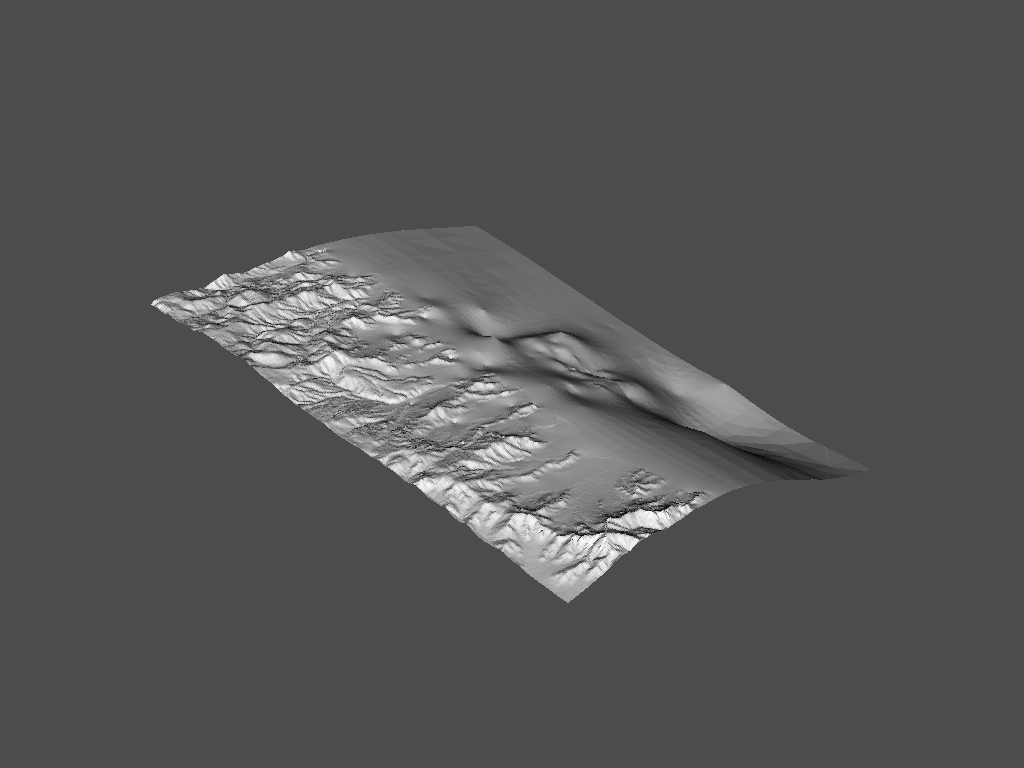

In [5]:
omfvtk.wrap(top_granitoid).plot(show_edges=False)

In [6]:
description='Negro Mag Fault used in the Phase 2B earth model. ' \
    'All data are georeferenced to UTM, zone 12N, NAD 83, NAVD 88.'

negro_mag_fault = surf_to_omf(
    'Negro_Mag_Fault_vertices.csv', 
    'negro_mag_fault',
    description
    )
negro_mag_fault.validate()

True

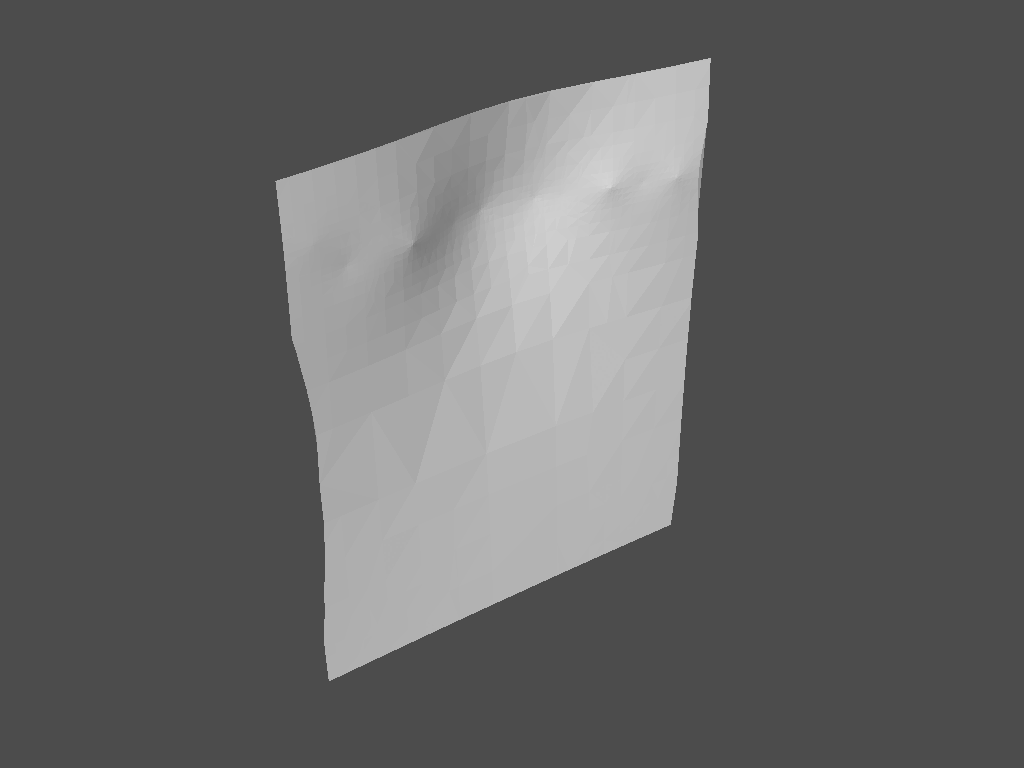

In [7]:
 omfvtk.wrap(negro_mag_fault).plot(show_edges=False)

In [8]:
description='surfaces of the Opal Mound Fault used in the Phase ' \
    '2B earth model. All data are georeferenced to UTM, zone '\
    '12N, NAD 83, NAVD 88.'

opal_mound_fault = surf_to_omf(
    'Opal_Mound_Fault_vertices.csv', 
    'opal_mound_fault',
    description
    )
opal_mound_fault.validate()

True

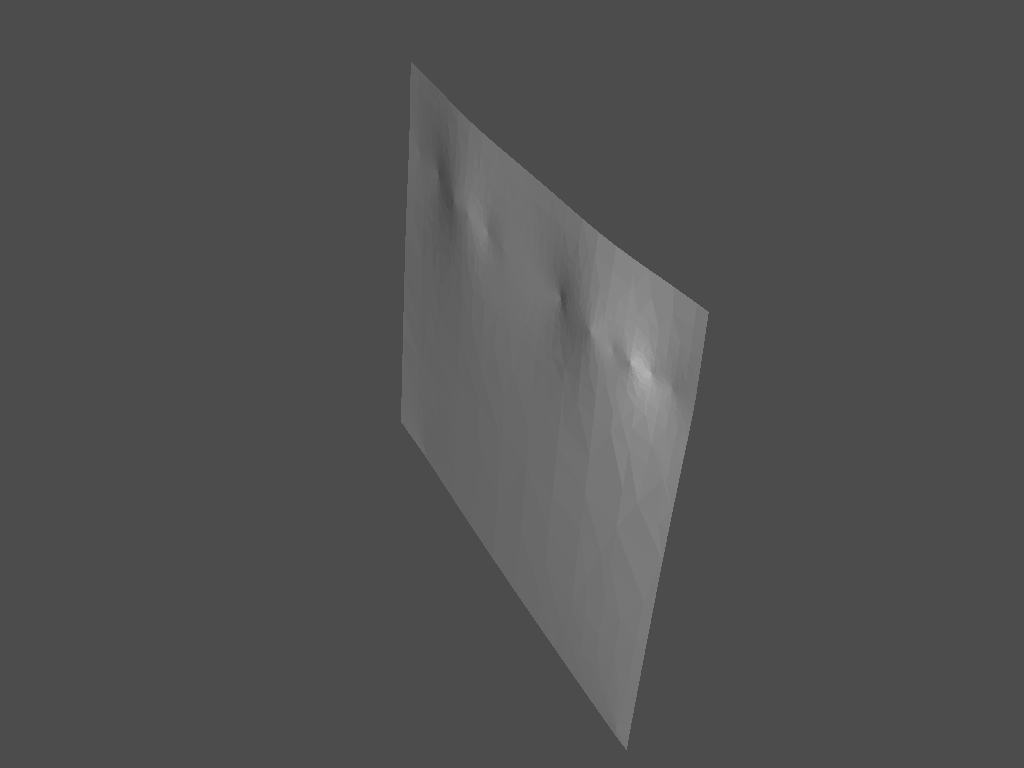

In [9]:
omfvtk.wrap(opal_mound_fault).plot(show_edges=False)

In [10]:
# temp_175c: '175C_vertices.csv'
description='vertices of meshed/interpolated surfaces of the ' \
    'interpolated temperature isosurfaces for 175 degrees C used ' \
    'in the Phase 2B earth model. All data are georeferenced to ' \
    'UTM, zone 12N, NAD 83, NAVD 88.'

temp_175c = surf_to_omf(
    '175C_vertices.csv', 
    'temp_175c',
    description
    )
temp_175c.validate()

True

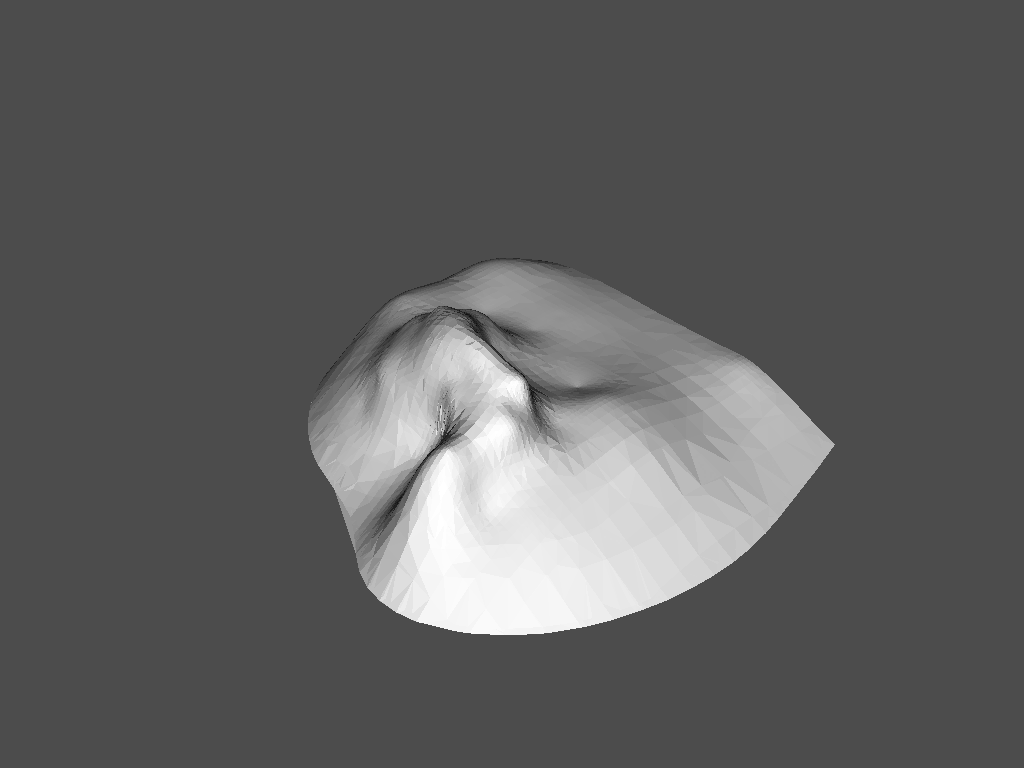

In [11]:
omfvtk.wrap(temp_175c).plot(show_edges=False)

In [12]:
# temp_225c: '225C_vertices.csv'
description='vertices of meshed/interpolated surfaces of the '\
    'interpolated temperature isosurfaces for 225 degrees C used '\
    'in the Phase 2B earth model. All data are georeferenced to ' \
    'UTM, zone 12N, NAD 83, NAVD 88.'

temp_225c = surf_to_omf(
    '225C_vertices.csv', 
    'temp_225c',
    description
    )
temp_225c.validate()

True

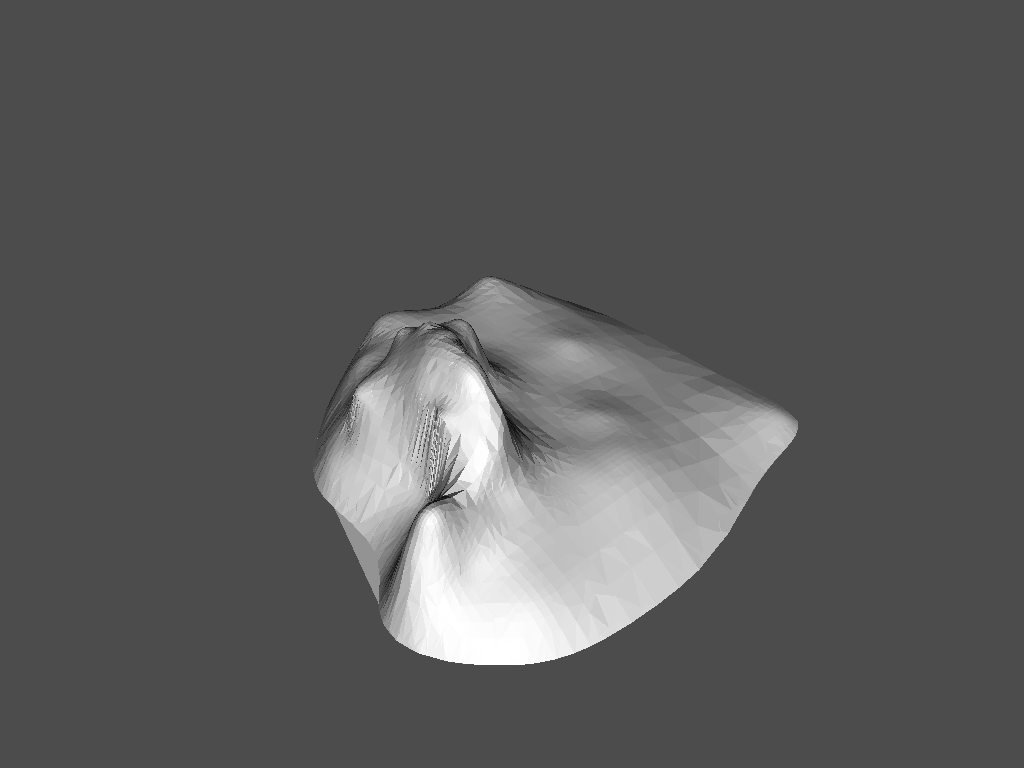

In [13]:
omfvtk.wrap(temp_225c).plot(show_edges=False)

In [14]:
# land_surface: 'land_surface_vertices.csv'
description='vertices of meshed/interpolated surfaces of the ' \
    'land surface (based on 10-meter DEM) used in the Phase 2B '\
    'earth model. All data are georeferenced to UTM, zone 12N, '\
    'NAD 83, NAVD 88.'

land_surface = surf_to_omf(
    'land_surface_vertices.csv', 
    'land_surface',
    description
    )
land_surface.validate()

True

In [15]:
# NOW ADD TEXTURES TO THE LAND SURFACE

fname = gdc19.get_gis_path('Geologic_map_on_air_photo.png')
name = 'geo_aer'
description = 'geologic map of the Utah FORGE site with aerial '\
    'imagery. All data are georeferenced to UTM, zone 12N, NAD '\
    '83, NAVD 88.'
geo_aer = gdc19.load_texture_to_omf(fname, name, description)

# topographic_map.png
fname = gdc19.get_gis_path('topographic_map.png')
name = 'topo_map'
description = ' topographic map of the Utah FORGE site. '\
    'All data are georeferenced to UTM, zone 12N, NAD 83, NAVD 88.'
topo_map = gdc19.load_texture_to_omf(fname, name, description)

# Geologic_map_no_quaternary.tif
fname = gdc19.get_gis_path('Geologic_map_no_quaternary.png')
name = 'geo_no_aer'
description = 'geologic map of the Utah FORGE site with '\
    'quaternary faults labeled. All data are georeferenced to UTM, '\
    'zone 12N, NAD 83, NAVD 88.'
geo_no_aer = gdc19.load_texture_to_omf(fname, name, description)

land_surface.textures = [geo_aer, topo_map, geo_no_aer]
land_surface.validate()

True

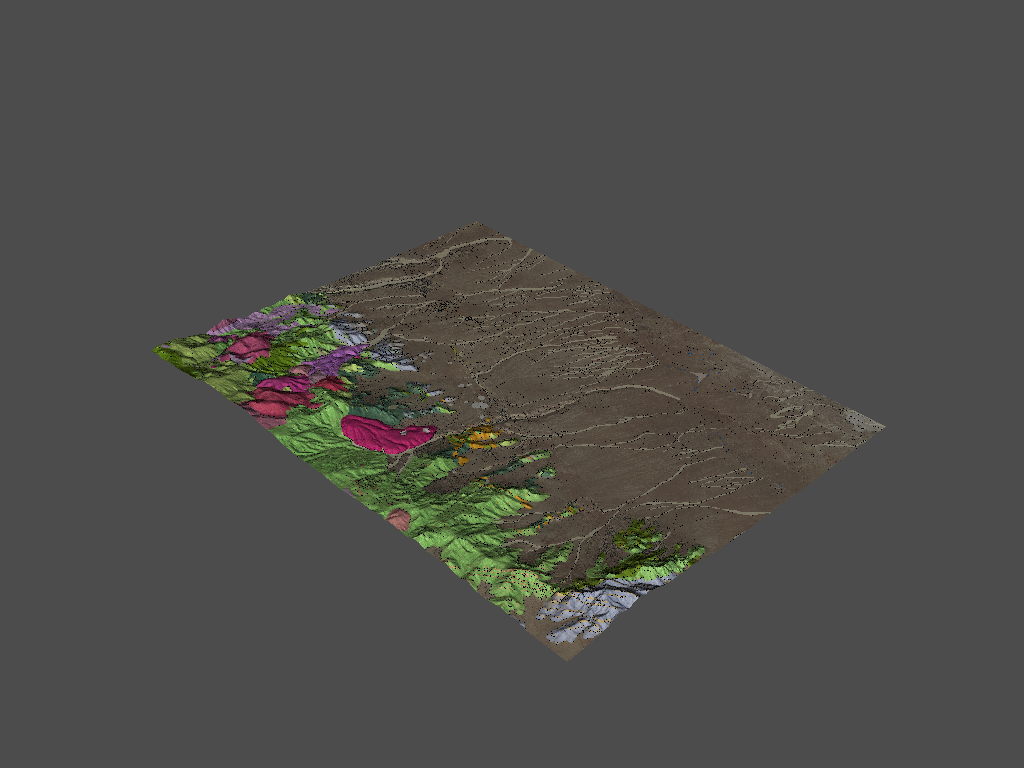

In [16]:
topo = omfvtk.wrap(land_surface)
topo.plot(show_edges=False, texture=True)

In [17]:
topo

(UnstructuredGrid)0x106a32ac8

## GIS Data

```
conda install gdal
```

Please not that textures must be hanlded on the VTK side due to issues within OMF

```py
topo = omfvtk.wrap(land_surface)
# Use convieance method to bind all the textures to the topography
gdc19.attach_all_textures(topo)
topo.plot(show_edges=False, texture=True)
```

In [18]:
# Load the shape files
shapes = gdc19.read_shape_file_to_omf(
    gdc19.get_shp_path('FORGE_Outline'), topo_points=topo.points
)
shapes

In [19]:
boundary = shapes[0]
boundary.name = 'boundary'
boundary.validate()

True

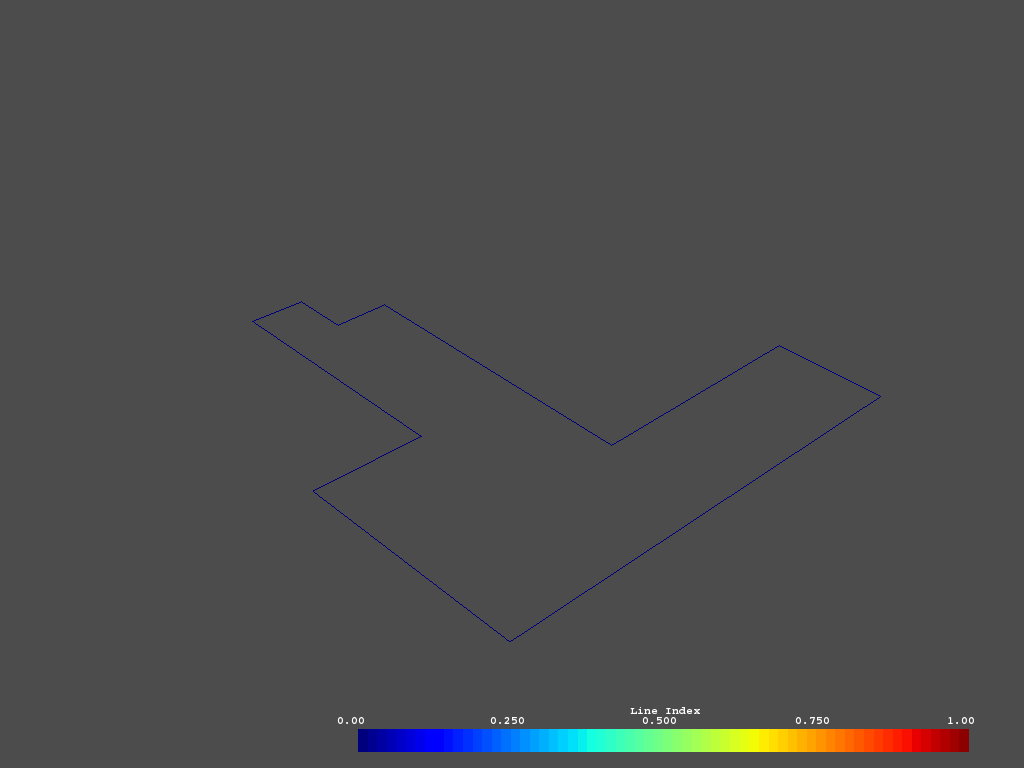

In [20]:
omfvtk.wrap(boundary).plot(show_edges=False)

## Temperature Data

In [21]:
# Load the temperature data
_temp = pd.read_csv(
            gdc19.get_temperature_path('well_based_temperature.csv')
            )
_temp.head()

,x,y,z,T
0,339385.01,4264212.99,1680.6,150.0
1,339385.01,4264212.99,880.6,195.0
2,339385.01,4264212.99,-119.4,195.0
3,337709.02,4260660.00,1596.3,250.0
4,337709.02,4260660.00,796.3,262.0


In [22]:
temperature = omf.PointSetElement(
    name='temperature',
    description='cumulative record of one-dimensional temperature modeling '\
        'based off of well data. Temperature log data were exampled and '\
        'extrapolated below the bottom of a number of wells. Temperatures '\
        'are in degrees Celsius, and all location data are georeferenced to '
        'UTM, zone 12N, NAD 83, NAVD 88.',
    subtype='point',
    geometry=omf.PointSetGeometry(
        vertices=_temp[['x', 'y', 'z']].values
    ),
    data=[omf.ScalarData(
        name='temperature (C)',
        array=_temp['T'].values,
        location='vertices'
    ),]
)
temperature.validate()

True

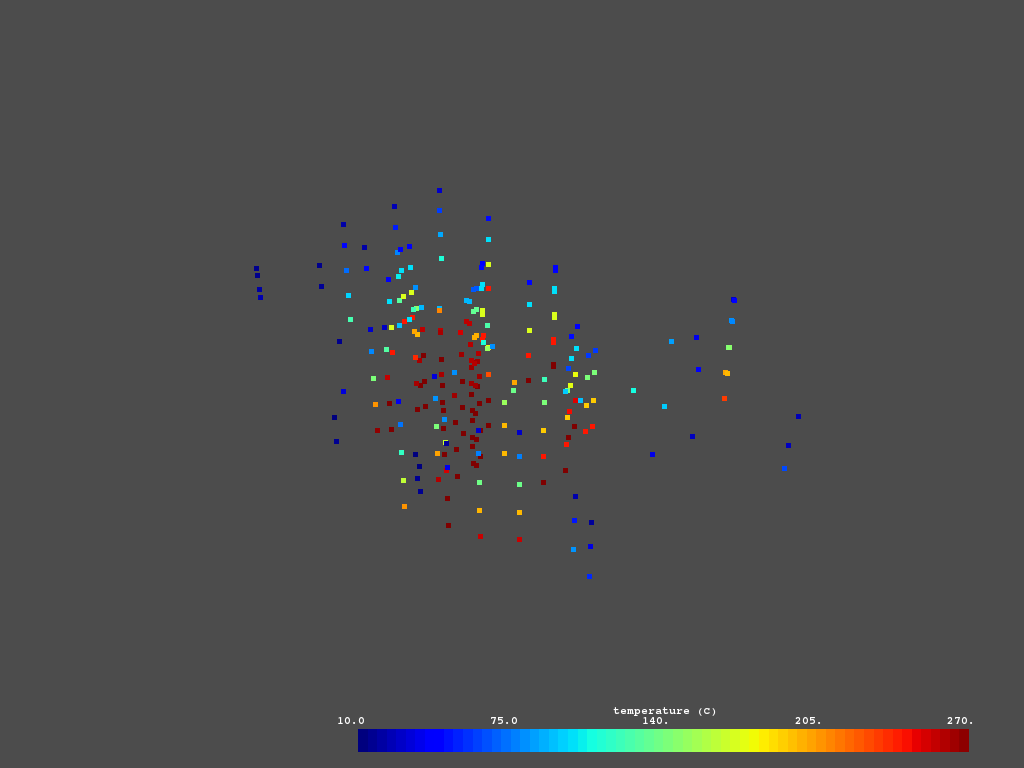

In [23]:
omfvtk.wrap(temperature).plot(show_edges=False)

## Well Data

Incomplete.

We'll use some of [`lasio`](https://lasio.readthedocs.io/en/latest/) for the file IO

In [24]:
gdc19.list_filenames(gdc19.get_well_path())

['58-32_sonic_log_data.csv',
 '58-32_xray_diffraction_data.csv',
 '58-32_sonic.las',
 'well_lithology_from_earth_model.csv',
 '58-32_main_geophysical_well_log.csv',
 'Acord 1-26_digitized_geophysical_well_log.las',
 'Acord 1-26_digitized_geophysical_well_log.csv',
 '58-32_thermal_conductivity_data.csv',
 '58-32_main.las',
 'well data readme.txt',
 'well_survey_from_earth_model.csv',
 'well_location_from_earth_model.csv']

In [25]:
import lasio
las = lasio.read(gdc19.get_well_path(r'Acord 1-26_digitized_geophysical_well_log.las'))
las.curvesdict.keys()

dict_keys(['DEPT', 'BAD_RHOB', 'BITSIZE', 'CALI', 'DRHO', 'DT', 'GAMMA_RAY_SPLICE', 'GR_PROCESS', 'GR_SPLICE', 'LLD_SPLICE', 'LLM_SPLICE', 'LLS_SPLICE', 'NEUTRON_SPLICE', 'RHOB_PROCESSING', 'RHOB_SPLICE', 'SP_SLICE', 'TEMPERATURE_DEEP', 'TEMPERATURE_SHALLOW'])

In [26]:
# plt.plot(las.index, las["GAMMA_RAY_SPLICE"])

In [27]:
# TODO

## Drilling Data

In [28]:
gdc19.get_drilling_path('Well_58-32_processed_pason_log.csv')

'/Volumes/GoogleDrive/My Drive/utah-forge/drilling/Well_58-32_processed_pason_log.csv'

In [29]:
gdc19.get_drilling_path('Well_58-32_raw_pason_log.csv')

'/Volumes/GoogleDrive/My Drive/utah-forge/drilling/Well_58-32_raw_pason_log.csv'

In [30]:
# TODO

## Injection data

In [31]:
injections = []
for f in gdc19.list_filenames('injection'):
    injections.append(pd.read_csv(gdc19.get_injection_path(f)))

In [32]:
injections[0].head()

,Time (hr),Pressure (psi),Pressure (MPa)
0,0.000000,11.839995,0.081634
1,0.001389,11.839508,0.081631
2,0.002778,11.848282,0.081691
3,0.004167,11.853885,0.081730
4,0.005556,11.858296,0.081760


In [33]:
injections[1].head()

,Time (hr),Flow (barrel/min),Flow (Liter/min)
0,13.152500,0.1,15.898729
1,13.152778,0.2,31.797459
2,13.153056,0.2,31.797459
3,13.153333,0.2,31.797459
4,13.153611,0.3,47.696188


In [34]:
# TODO

## Now Save out the Project

In [35]:
# And now create an OMF project file for the surfaces
proj = omf.Project(
    name='FORGE Surfaces',
    description='All data for the 2019 FORGE Geothermal Student Competition '
)

In [36]:
proj.elements = [
                 # Surfaces
                 land_surface, 
                 temp_225c, 
                 temp_175c, 
                 opal_mound_fault,
                 negro_mag_fault,
                 top_granitoid,
                 # Pointsets
                 boundary,
                 temperature,
                 # Well Data
                 # TODO
                 # Drilling Data
                 # TODO
                 # Injection Data
                 # TODO
                ]

In [37]:
proj.validate()

True

In [38]:
# Save the surface project file
omf.OMFWriter(proj, gdc19.get_omf_project_filename())